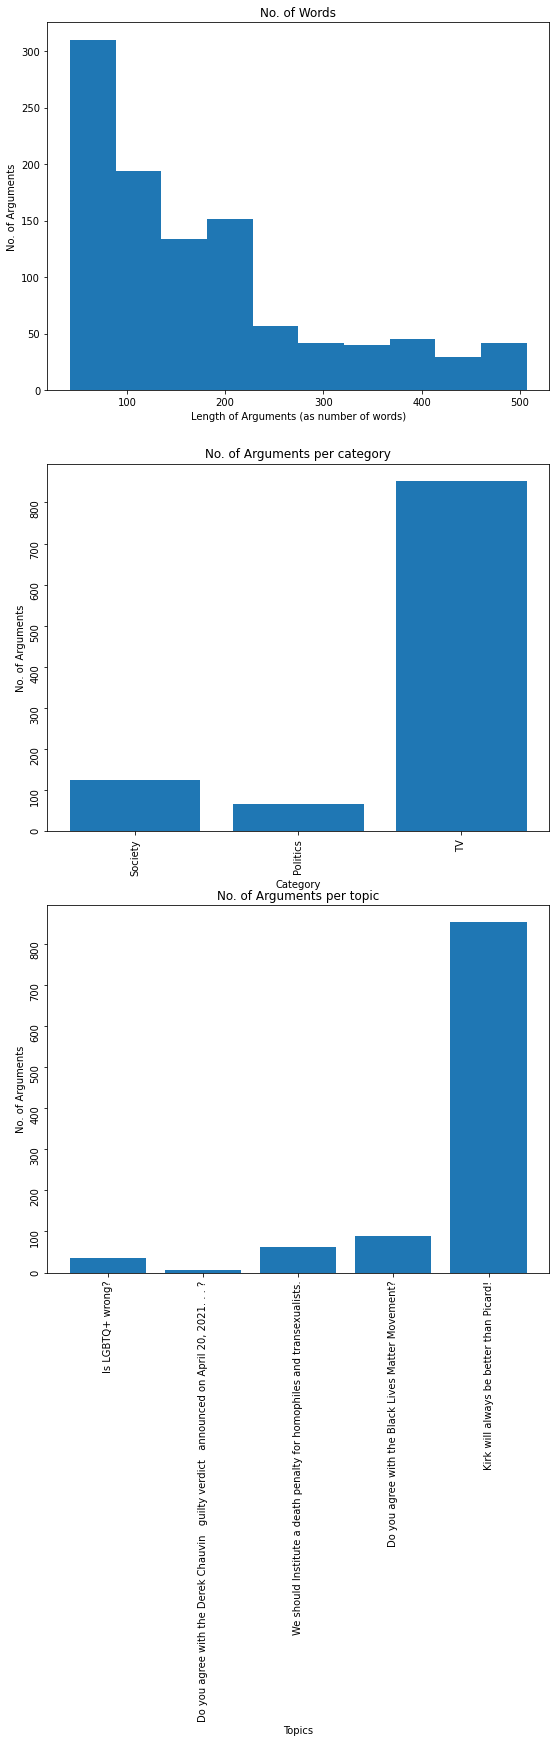

In [1]:
#import all the libraries
import json
import matplotlib.pyplot as plt
import pandas as pd

#load the json file from given path
with open("data.json", "r") as f:
    debate_data = json.load(f)

#initialise empty arrays 
words_arr = []

total_args_arr = []

total_args_by_category_arr = []

category_list = []

topic_list = []

#store length(no. of topics) of the debate_data array
debate_data_len = len(debate_data)

#loop for processing each topic in debate_data
for x in range(debate_data_len):
	# fetch the list of pro and con arguments and store it
	pro_arguments = debate_data[x]['pro_arguments']
	con_arguments = debate_data[x]['con_arguments']
    
    # store the category and topic name of each topic in lists
	category_list.append(debate_data[x]['category'])
	topic_list.append(debate_data[x]['topic'])

    # calculate the lenght of pro_arguments and con_arguments lists
	no_of_pro_args = len(pro_arguments)
	no_of_con_args = len(con_arguments)

    # loop for processing each pro argument
	for y in range(no_of_pro_args):
		pro_words = 0									   # initialize pro_words variable to zero
		pro_arg_body = pro_arguments[y]['body']			   # fetch the argument body and store it in "pro_arg_body"
		pro_words = len(pro_arg_body.split())  			   # calculate the no. of words in the fetched body.
		words_arr.append(pro_words)						   # append the no. of pro words found to words_arr array
    
    # loop for processing each con argument
	for z in range(no_of_con_args):
		con_words = 0									   # initialize con_words variable to zero	
		con_arg_body = con_arguments[z]['body']            # fetch the argument body and store it in "con_arg_body"
		con_words = len(con_arg_body.split())  			   # calculate the no. of words in the fetched body.
		words_arr.append(pro_words)						   # append the no. of con words found to words_arr array


	# store the total number of arguments
	total_args_arr.append(no_of_pro_args + no_of_con_args)


category_list = pd.unique(category_list).tolist() 	# remove the duplicate elements from the list
category_list_len = len(category_list) 				# calculate the length of the list

# loop for processing each category
for p in range(category_list_len):
	no_of_args = 0 												# initialize the number of arguments to zero
	for x in range(debate_data_len):							# looping each topic in the debate_data
		if category_list[p] == debate_data[x]['category']: 		# check if the category is equal to the category of the topic in the loop
			no_of_args = no_of_args + total_args_arr[x] 		# add the number of args for that category and stored it in "no_of_args"
	total_args_by_category_arr.append(no_of_args) 				# store the no_of_args by appending it to "total_args_by_category_arr" list

# Plotting Graphs
# Divide the plot into 3 subplots
(row,column,size_height,size_width) = (3,1,9,23)
f, (ax1, ax2, ax3) = plt.subplots(row, column, figsize=(size_height,size_width))

# Set the labels of x-axis to rotate to 90 degrees
ax2.tick_params(labelrotation=90)
ax3.tick_params(labelrotation=90)

# Plot the histogram for number of words
ax1.hist(words_arr)

#Plot the bar graphs for number of arguments for category and topic respectively
ax2.bar(category_list,total_args_by_category_arr)
ax3.bar(topic_list,total_args_arr)

# Setting the title of each subplots
ax1.set_title('No. of Words')
ax2.set_title('No. of Arguments per category')
ax3.set_title('No. of Arguments per topic')

# Setting axis label for each subplot
ax1.set_xlabel('Length of Arguments (as number of words)')
ax1.set_ylabel('No. of Arguments')

ax2.set_xlabel('Category')
ax2.set_ylabel('No. of Arguments')

ax3.set_xlabel('Topics')
ax3.set_ylabel('No. of Arguments')

plt.show()